Εισαγωγή δεδομένων στα dataframes **df_train,df_test:**

In [2]:
import numpy as np

from sklearn import ensemble
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,PAX
0,2011-12-05,ORD,Chicago,41.978603,-87.904842,EWR,Newark,40.692500,-74.168667,8.352941,5.667243,7
1,2013-03-01,ATL,Atlanta,33.636719,-84.428067,LGA,New York,40.777245,-73.872608,10.421053,10.001754,7
2,2012-02-06,ORD,Chicago,41.978603,-87.904842,BOS,Boston,42.364347,-71.005181,9.250000,7.136821,7
3,2012-12-10,ORD,Chicago,41.978603,-87.904842,SFO,San Francisco,37.618972,-122.374889,8.666667,7.404291,7
4,2012-04-13,SFO,San Francisco,37.618972,-122.374889,JFK,New York,40.639751,-73.778925,14.037037,9.858544,7


Εισαγωγή ενός  νέου πεδίου **DateOfDepartutedt** που περιέχει το DateOfDeparture σε τύπο **datetime** αντί String:

In [3]:
from datetime import date
df_train['DateOfDeparturedt'] =  pd.to_datetime(df_train['DateOfDeparture'], format='%Y-%M-%d')
df_test['DateOfDeparturedt'] =  pd.to_datetime(df_test['DateOfDeparture'], format='%Y-%M-%d')

Δημιουργία δύο νέων στηλών **Weekday**, **Year** που περιέχουν την ημέρα  και το έτος αναχώρησης αντίστοιχα:

In [4]:
df_train['Weekday']=df_train['DateOfDeparturedt'].dt.dayofweek
df_test['Weekday']=df_test['DateOfDeparturedt'].dt.dayofweek

df_train['Year']=df_train['DateOfDeparturedt'].dt.year
df_test['Year']=df_test['DateOfDeparturedt'].dt.year
df_test.shape

(2229, 14)

Μετατροπή του πλέον μη χρήσιμου αλφαριθμητικού DateOfDeparture σε int που δηλώνει τον μήνα κάθε αναχώρησης:

In [5]:
df_train.DateOfDeparture=df_train.DateOfDeparture.str.slice(-5,-3).astype(int)
df_test.DateOfDeparture=df_test.DateOfDeparture.str.slice(-5,-3).astype(int)
df_train.head()


,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,PAX,DateOfDeparturedt,Weekday,Year
0,12,ORD,Chicago,41.978603,-87.904842,EWR,Newark,40.692500,-74.168667,8.352941,5.667243,7,2011-01-05 00:12:00,2,2011
1,3,ATL,Atlanta,33.636719,-84.428067,LGA,New York,40.777245,-73.872608,10.421053,10.001754,7,2013-01-01 00:03:00,1,2013
2,2,ORD,Chicago,41.978603,-87.904842,BOS,Boston,42.364347,-71.005181,9.250000,7.136821,7,2012-01-06 00:02:00,4,2012
3,12,ORD,Chicago,41.978603,-87.904842,SFO,San Francisco,37.618972,-122.374889,8.666667,7.404291,7,2012-01-10 00:12:00,1,2012
4,4,SFO,San Francisco,37.618972,-122.374889,JFK,New York,40.639751,-73.778925,14.037037,9.858544,7,2012-01-13 00:04:00,4,2012


Συνοπτικά έχουμε την μετατροπή του DateOfDeparture σε τρείς στήλες που περιέχουν ξεχωριστά μήνα,έτος και ημέρα αναχώρησης.

Επίσης, σκεφτήκαμε ότι θα βελτίωνε τις προβλέψεις μας μια μεταβλητή η οποία θα δήλωνε εάν η ημέρα αναχώρησης ήταν μέρα διακοπών,διότι συνήθως τις ημέρες διακοπών-γιορτών παρατηρείται αυξημένη κίνηση στα αεροδρόμια και στον αριθμό επιβατών κάθε πτήσης. Το συγκεκριμένο train dataset αφορά τις Ηνωμένες Πολιτείες για αυτό και οι αργίες/γιορτές που εντοπίσαμε είναι οι αμερικάνικες.
Χρησιμοποιήσαμε το πακέτο holidays που περιέχει ένα σύνολο από ημερομηνίες αργίας,και συγκεκριμένα τις περιορίσαμε μόνο στις αργίες των Ηνωμένων Πολιτειών. (link:  https://pypi.org/project/holidays/ ).

In [6]:
#Arxikopoihsh sthlhs Holidays
df_train['Holidays']=df_train['DateOfDeparture']
df_test['Holidays']=df_test['DateOfDeparture']

Έλεγχος αν η ημέρα αναχώρησης είναι κάποια αργία και εισαγωγή **1 αν ναι, 0** διαφορετικά:

In [7]:
import holidays
us_holidays = holidays.UnitedStates()

crows=df_train.shape[0]
for i in range(0,crows):
    if df_train.iloc[i,12] in us_holidays:
        df_train.iloc[i,15]=1
    else:
         df_train.iloc[i,15]=0
            
crows=df_test.shape[0]
for i in range(0,crows):
    if df_test.iloc[i,11] in us_holidays:
        df_test.iloc[i,14]=1
    else:
         df_test.iloc[i,14]=0

Όσον αφορά τις στήλες **std_wtd** και **WeeksToDeparture** αποφασίσαμε ότι μπορούν να προσδιοριστούν καλύτερα από τον λόγο αυτών και έτσι δημιουργήσαμε μία νέα μεταβλητή **stdwtddiff** και αφαιρέσαμε εκείνες:

In [8]:

df_train['stdwtddiff']=df_train['std_wtd']/df_train['WeeksToDeparture']
df_test['stdwtddiff']=df_test['std_wtd']/df_test['WeeksToDeparture']


df_train['stdwtddiff']=df_train['stdwtddiff'].abs()
df_test['stdwtddiff']=df_test['stdwtddiff'].abs()

Τις στήλες **LongitudeDeparture,LatitudeDeparture,LongitudeArrival,LatitudeArrival** τις χρησιμοποιήσαμε με σκοπό την εύρεση της **απόστασης** μεταξύ του σημείου αναχώρησης με το σημείο προορισμού και τις αφαιρέσαμε από τον πίνακα με τα δεδομένα εκπαίδευσης:

In [9]:
import math
#def distance(lat1, lon1, lat2, lon2):
 #   p = 0.017453292519943295     #Pi/180
 #   a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
 #   return 12742 * asin(sqrt(a))

def distance(lat1,lon1, lat2,lon2):
    
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
         *math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [10]:
df_train['Distance']=df_train['LatitudeDeparture']
df_test['Distance']=df_test['LatitudeDeparture']

crows=df_train.shape[0]
for i in range(0,crows):
        df_train.iloc[i,17]=distance( df_train.iloc[i,4], df_train.iloc[i,3], df_train.iloc[i,8], df_train.iloc[i,7])
            
crows=df_test.shape[0]
for i in range(0,crows):
        df_test.iloc[i,16]=distance( df_test.iloc[i,4], df_test.iloc[i,3], df_test.iloc[i,8], df_test.iloc[i,7])
 


Παρακάτω αξιοποιήσαμε τον πίνακα του link : https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States 
έτσι ώστε να βρούμε τα αεροδρόμια που βρίσκονται στο train dataset μας,και να τα χαρακτηρίσουμε ανάλογα με το πόσο δημοφιλή ήταν τις τρεις χρονιές που υπάρχουν στο dataset, ως πολύ,μέτρια ή λίγο δημοφιλή (1, 2 ή 3 αντίστοιχα).

Πιο αναλυτικά,δημιουργήθηκαν τρεις νέες στήλες η πρώτη **AirportDepartureTraffic** περιγράφει πόσο δημοφιλές είναι το αεροδρόμιο αναχώρησης,η δεύτερη **AirportArrivalTraffic** το αεροδρόμιο προορισμού, και η τρίτη **AirportsTraffic** συνδυάζει τις δύο προηγούμενες.


In [11]:
#https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States 
#Xrhsimopoiontas ton pinaka gia ta dhmofilh aerodromia anaxwrhshs
#AirportTraffic
#  HIGHB>=30     ATL,ORD,LAX              -->1
#  20<=MEDB<30   DFW,DEN,JFK,SFO,CLT      -->2
#  LOWB<20       LAS,PHX,IAH,MIA,MCO,EWR,SEA,MSP,DTW,PHL,BOS,LGA    -->3
df_train['AirportDepartureTraffic']=df_train['Departure']
df_test['AirportDepartureTraffic']=df_test['Departure']

crows=df_train.shape[0]
for i in range(0,crows):
    if df_train.iloc[i,1]=='ATL' or  df_train.iloc[i,1]=='ORD' or df_train.iloc[i,1]=='LAX':
        df_train.iloc[i,18]=1
    elif df_train.iloc[i,1]=='DFW' or  df_train.iloc[i,1]=='DEN' or df_train.iloc[i,1]=='JFK'or  df_train.iloc[i,1]=='SFO' or df_train.iloc[i,1]=='CLT':
        df_train.iloc[i,18]=2
    else:
        df_train.iloc[i,18]=3
    
            
crows=df_test.shape[0]
for i in range(0,crows):
    if df_test.iloc[i,1]=='ATL' or  df_test.iloc[i,1]=='ORD' or df_test.iloc[i,1]=='LAX':
        df_test.iloc[i,17]=1
    elif df_test.iloc[i,1]=='DFW' or  df_test.iloc[i,1]=='DEN' or df_test.iloc[i,1]=='JFK'or  df_test.iloc[i,1]=='SFO' or df_test.iloc[i,1]=='CLT':
        df_test.iloc[i,17]=2
    else:
        df_test.iloc[i,17]=3



In [12]:
df_train['AirportArrivalTraffic']=df_train['Arrival']
df_test['AirportArrivalTraffic']=df_test['Arrival']

crows=df_train.shape[0]
for i in range(0,crows):
    if df_train.iloc[i,5]=='ATL' or  df_train.iloc[i,5]=='ORD' or df_train.iloc[i,5]=='LAX':
        df_train.iloc[i,19]=1
    elif df_train.iloc[i,5]=='DFW' or  df_train.iloc[i,5]=='DEN' or df_train.iloc[i,5]=='JFK'or  df_train.iloc[i,5]=='SFO' or df_train.iloc[i,5]=='CLT':
        df_train.iloc[i,19]=2
    else:
        df_train.iloc[i,19]=3
    
            
crows=df_test.shape[0]
for i in range(0,crows):
    if df_test.iloc[i,5]=='ATL' or  df_test.iloc[i,5]=='ORD' or df_test.iloc[i,5]=='LAX':
        df_test.iloc[i,18]=1
    elif df_test.iloc[i,5]=='DFW' or  df_test.iloc[i,5]=='DEN' or df_test.iloc[i,5]=='JFK'or  df_test.iloc[i,5]=='SFO' or df_test.iloc[i,5]=='CLT':
        df_test.iloc[i,18]=2
    else:
        df_test.iloc[i,18]=3


In [13]:
df_test.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,DateOfDeparturedt,Weekday,Year,Holidays,stdwtddiff,Distance,AirportDepartureTraffic,AirportArrivalTraffic
0,10,DFW,Dallas-Fort Worth,32.896828,-97.037997,SFO,San Francisco,37.618972,-122.374889,14.600000,11.575837,2012-01-21 00:10:00,5,2012,0,0.792866,2820.647461,2,2
1,9,LAX,Los Angeles,33.942536,-118.408075,ATL,Atlanta,33.636719,-84.428067,14.730769,13.364304,2012-01-13 00:09:00,4,2012,0,0.907237,3778.396996,1,1
2,9,ORD,Chicago,41.978603,-87.904842,IAH,Houston,29.984433,-95.341442,8.470588,5.885551,2012-01-04 00:09:00,2,2012,0,0.694822,823.246832,1,3
3,8,DEN,Denver,39.861656,-104.673178,PHX,Phoenix,33.434278,-112.011583,8.200000,6.292853,2012-01-13 00:08:00,4,2012,0,0.767421,845.236307,2,3
4,9,ORD,Chicago,41.978603,-87.904842,SEA,Seattle,47.449000,-122.309306,12.090909,9.138662,2012-01-10 00:09:00,1,2012,0,0.755829,3824.598266,1,3


In [14]:
df_train['AirportsTraffic']=df_train['Arrival']
df_test['AirportsTraffic']=df_test['Arrival']

crows=df_train.shape[0]
for i in range(0,crows):
    if df_train.iloc[i,18]==1 and df_train.iloc[i,19]==1:
        df_train.iloc[i,20]=1
    elif df_train.iloc[i,18]==1 and df_train.iloc[i,19]==2:
        df_train.iloc[i,20]=1
    elif df_train.iloc[i,18]==1 and df_train.iloc[i,19]==3:
        df_train.iloc[i,20]=2
    elif df_train.iloc[i,18]==2 and df_train.iloc[i,19]==1:
        df_train.iloc[i,20]=1
    elif df_train.iloc[i,18]==2 and df_train.iloc[i,19]==2:
        df_train.iloc[i,20]=2
    elif df_train.iloc[i,18]==2 and df_train.iloc[i,19]==3:
        df_train.iloc[i,20]=3
    elif df_train.iloc[i,18]==3 and df_train.iloc[i,19]==1:
        df_train.iloc[i,20]=2
    elif df_train.iloc[i,18]==3 and df_train.iloc[i,19]==2:
        df_train.iloc[i,20]=3
    elif df_train.iloc[i,18]==3 and df_train.iloc[i,19]==3:
        df_train.iloc[i,20]=3
    else:
        df_train.iloc[i,20]=2
   
    
            
crows=df_test.shape[0]
for i in range(0,crows):
    if df_test.iloc[i,18]==1 and df_test.iloc[i,17]==1:
        df_test.iloc[i,19]=1
    elif df_test.iloc[i,18]==1 and df_test.iloc[i,17]==2:
        df_test.iloc[i,19]=1
    elif df_test.iloc[i,18]==1 and df_test.iloc[i,17]==3:
        df_test.iloc[i,19]=2
    elif df_test.iloc[i,18]==2 and df_test.iloc[i,17]==1:
        df_test.iloc[i,19]=1
    elif df_test.iloc[i,18]==2 and df_test.iloc[i,17]==2:
        df_test.iloc[i,19]=2
    elif df_test.iloc[i,18]==2 and df_test.iloc[i,17]==3:
        df_test.iloc[i,19]=3
    elif df_test.iloc[i,18]==3 and df_test.iloc[i,17]==1:
        df_test.iloc[i,19]=2
    elif df_test.iloc[i,18]==3 and df_test.iloc[i,17]==2:
        df_test.iloc[i,19]=3
    elif df_test.iloc[i,18]==3 and df_test.iloc[i,17]==3:
        df_test.iloc[i,19]=3
    else:
        df_test.iloc[i,19]=2

In [15]:
df_test.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,DateOfDeparturedt,Weekday,Year,Holidays,stdwtddiff,Distance,AirportDepartureTraffic,AirportArrivalTraffic,AirportsTraffic
0,10,DFW,Dallas-Fort Worth,32.896828,-97.037997,SFO,San Francisco,37.618972,-122.374889,14.600000,11.575837,2012-01-21 00:10:00,5,2012,0,0.792866,2820.647461,2,2,2
1,9,LAX,Los Angeles,33.942536,-118.408075,ATL,Atlanta,33.636719,-84.428067,14.730769,13.364304,2012-01-13 00:09:00,4,2012,0,0.907237,3778.396996,1,1,1
2,9,ORD,Chicago,41.978603,-87.904842,IAH,Houston,29.984433,-95.341442,8.470588,5.885551,2012-01-04 00:09:00,2,2012,0,0.694822,823.246832,1,3,2
3,8,DEN,Denver,39.861656,-104.673178,PHX,Phoenix,33.434278,-112.011583,8.200000,6.292853,2012-01-13 00:08:00,4,2012,0,0.767421,845.236307,2,3,3
4,9,ORD,Chicago,41.978603,-87.904842,SEA,Seattle,47.449000,-122.309306,12.090909,9.138662,2012-01-10 00:09:00,1,2012,0,0.755829,3824.598266,1,3,2


Μέσω του παρακάτω πίνακα προσπαθήσαμε να βρούμε την συσχέτιση των διαφόρων μεταβλητών μεταξύ τους

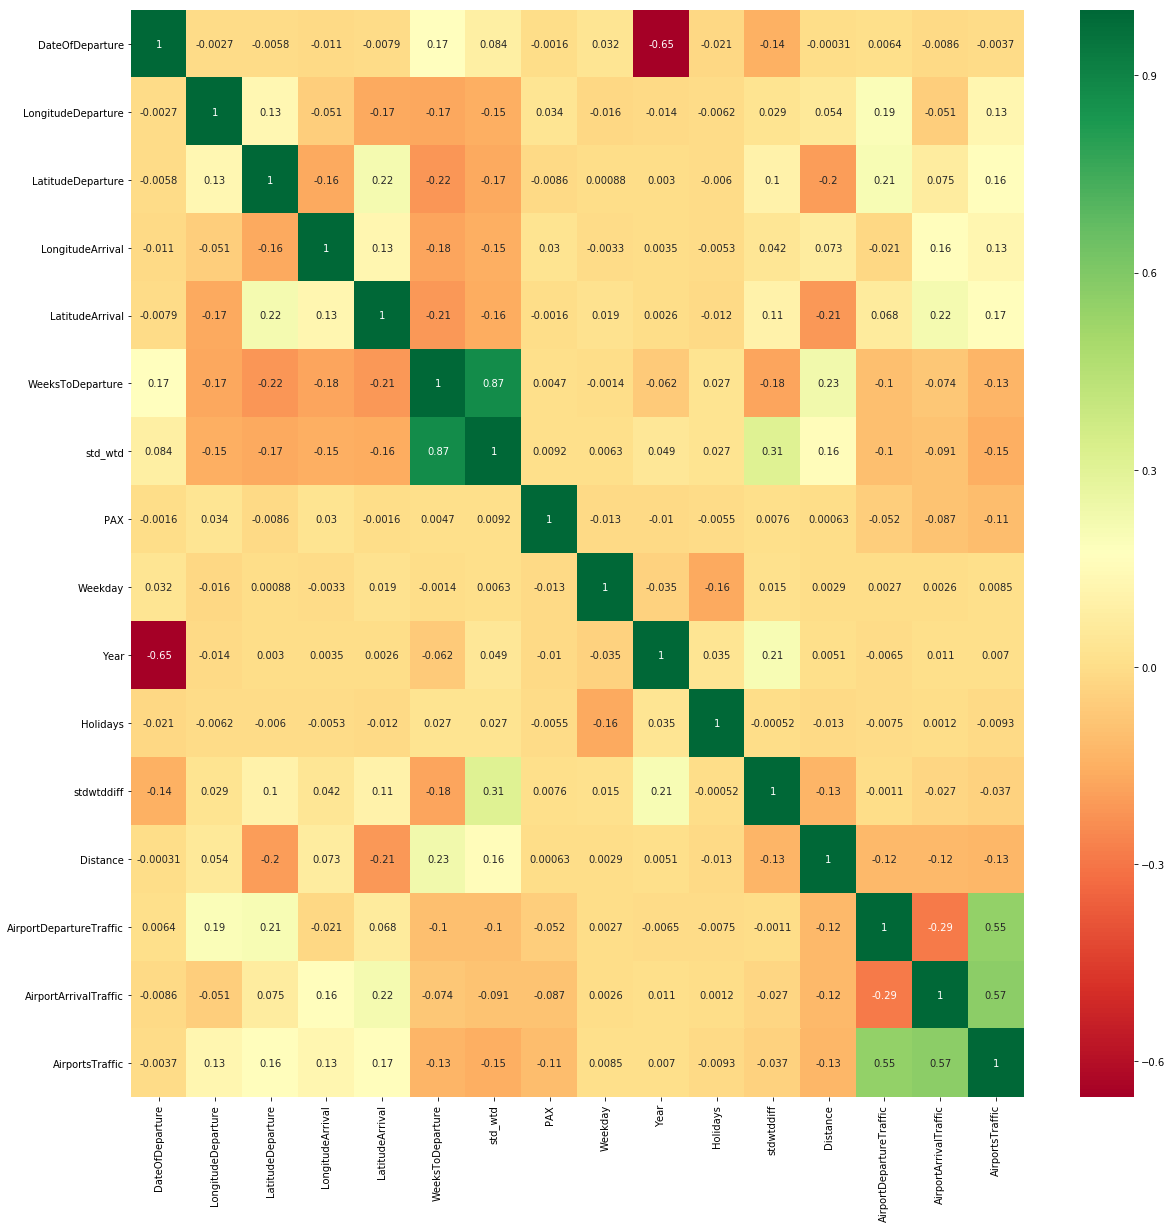

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#data = pd.read_csv("D://Blogs//train.csv")
X = df_train.iloc[:,0:21]  #independent columns
y = df_train.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Εδώ γίνεται η αφαίρεση των στηλών που δεν μας είναι χρήσιμες και εμφανίζονται οι στήλες που θα χρησιμοποιηθούν:

In [41]:
y_train = df_train[['PAX']]

from sklearn.model_selection import train_test_split
#df_train, df_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.2, random_state=42)


df_train.drop(df_train.columns[[2,3,4,6,7,8,9,10,11,12]], axis=1, inplace=True)


df_train.head()

,DateOfDeparture,Departure,Arrival,Weekday,Year,Holidays,stdwtddiff,Distance,AirportDepartureTraffic,AirportArrivalTraffic,AirportsTraffic
0,12,ORD,EWR,2,2011,0,0.678473,1527.460383,1,3,2
1,3,ATL,LGA,1,2013,1,0.959764,1180.966211,1,3,2
2,2,ORD,BOS,4,2012,0,0.771548,1879.162476,1,3,2
3,12,ORD,SFO,1,2012,0,0.854341,3832.256704,1,2,1
4,4,SFO,JFK,4,2012,0,0.702324,5401.859069,2,2,2


In [42]:
df_test.drop(df_test.columns[[2,3,4,6,7,8,9,10,11]], axis=1, inplace=True)
                             
df_test.head()

,DateOfDeparture,Departure,Arrival,Weekday,Year,Holidays,stdwtddiff,Distance,AirportDepartureTraffic,AirportArrivalTraffic,AirportsTraffic
0,10,DFW,SFO,5,2012,0,0.792866,2820.647461,2,2,2
1,9,LAX,ATL,4,2012,0,0.907237,3778.396996,1,1,1
2,9,ORD,IAH,2,2012,0,0.694822,823.246832,1,3,2
3,8,DEN,PHX,4,2012,0,0.767421,845.236307,2,3,3
4,9,ORD,SEA,1,2012,0,0.755829,3824.598266,1,3,2


Χρησιμοποιώντας τον LabelEncoder μετατρέπουμε τις στήλες **Departure,Arrival** σε ακέραιους:

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_train['Departure'])

df_train['Departure'] = le.transform(df_train['Departure'])
df_train['Arrival'] = le.transform(df_train['Arrival'])

df_test['Departure'] = le.transform(df_test['Departure'])
df_test['Arrival'] = le.transform(df_test['Arrival'])

In [44]:
df_test.head()

,DateOfDeparture,Departure,Arrival,Weekday,Year,Holidays,stdwtddiff,Distance,AirportDepartureTraffic,AirportArrivalTraffic,AirportsTraffic
0,10,4,19,5,2012,0,0.792866,2820.647461,2,2,2
1,9,10,0,4,2012,0,0.907237,3778.396996,1,1,1
2,9,15,7,2,2012,0,0.694822,823.246832,1,3,2
3,8,3,17,4,2012,0,0.767421,845.236307,2,3,3
4,9,15,18,1,2012,0,0.755829,3824.598266,1,3,2


In [45]:
df_train.head()

,DateOfDeparture,Departure,Arrival,Weekday,Year,Holidays,stdwtddiff,Distance,AirportDepartureTraffic,AirportArrivalTraffic,AirportsTraffic
0,12,15,6,2,2011,0,0.678473,1527.460383,1,3,2
1,3,0,11,1,2013,1,0.959764,1180.966211,1,3,2
2,2,15,1,4,2012,0,0.771548,1879.162476,1,3,2
3,12,15,19,1,2012,0,0.854341,3832.256704,1,2,1
4,4,19,8,4,2012,0,0.702324,5401.859069,2,2,2


Κωδικοποιούμε τα dataframe με τον OneHotEncoder:

In [46]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
enc.fit(df_train)  
X_train = enc.transform(df_train) 
X_test = enc.transform(df_test)
X_train.shape

(8899, 138)

Εδώ γίνεται η υλοποίηση του MLPClassifier για το  νέο μας dataset:

In [47]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(15,21), random_state=42)
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred=clf.predict(X_test)
clf.score(X_train, y_train)

C:\Users\terminal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5657939094280257

Τέλος,γίνεται η εγγραφή των αποτελεσμάτων πρόβλεψης στο αρχείο y_pred.csv:

In [48]:
import csv
with open('y_pred.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Id', 'Label'])
    for i in range(y_pred.shape[0]):
        writer.writerow([i, y_pred[i]])